In [155]:
import os
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Dropout, MaxPooling2D, UpSampling2D
from keras.optimizers import Adadelta
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from skimage.io import imread
from keras.models import Model
from keras.utils import plot_model


In [139]:
figuras = []
epoch_x =0

## 1. Read images

In [140]:
TRAIN_IMG_PATH = 'banco_dados_SB/train/imagens/'
TRAIN_LBL_PATH = 'banco_dados_SB/train/classes/'

TEST_IMG_PATH = 'banco_dados_SB/test/imagens/'
TEST_LBL_PATH = 'banco_dados_SB/test/classes/'

In [141]:
NRED_IMG = os.listdir (TRAIN_IMG_PATH)
NRED_IMG = NRED_IMG [:5]
X_train = [imread(fname=TRAIN_IMG_PATH + img, as_grey=True) for img in NRED_IMG]
y_train = [imread(fname=TRAIN_LBL_PATH + lbl)[:, :, 0] for lbl in NRED_IMG]

In [142]:
X_train = np.asarray(X_train)/256
y_train = np.asarray(y_train)

In [143]:
NRED_IMG_T = os.listdir (TEST_IMG_PATH)
NRED_IMG_T = NRED_IMG_T [:5]
X_test = [imread(fname=TEST_IMG_PATH + img, as_grey=True) for img in NRED_IMG_T]
y_test = [imread(fname=TEST_LBL_PATH + lbl)[:, :, 0] for lbl in NRED_IMG_T]

In [144]:
X_test = np.asarray(X_test)/256
y_test = np.asarray(y_test)

### Testing data set

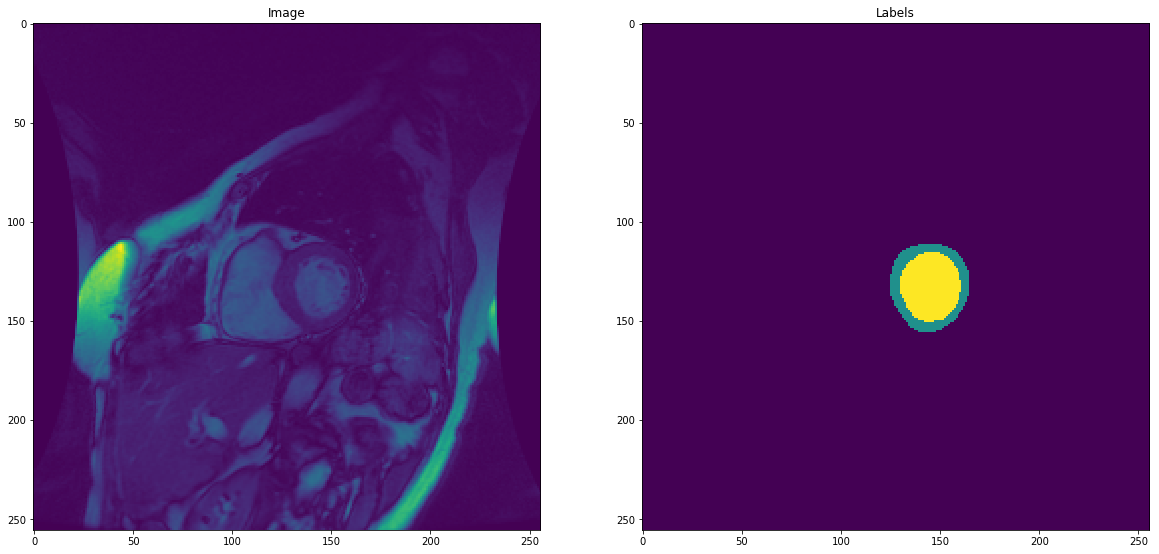

In [145]:
idx = 4

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(X_train[idx])
ax[0].set_title('Image')

ax[1].imshow(y_train[idx])
ax[1].set_title('Labels')

plt.show()

## 2. Create CNN model

In [146]:
input_shape = (X_train[0].shape[0], X_train[0].shape[1], 1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'glorot_normal',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer= 'glorot_normal', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer= 'glorot_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_initializer= 'glorot_normal', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_initializer= 'glorot_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (7, 7), activation='relu',kernel_initializer= 'glorot_normal', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(512, (7, 7), activation='relu',kernel_initializer= 'glorot_normal', padding='same',name = 'conv_teste'))
model.add(Dropout(0.5))
model.add(Conv2D(3, (7, 7), activation='relu',kernel_initializer= 'glorot_normal', padding='same'))
model.add(UpSampling2D(size=(8, 8)))
model.add(Activation(activation='softmax'))

# layer intermediario
layer_name = 'conv_teste'
intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)


In [147]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 64, 64, 256)       295168    
__________

In [148]:
model.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

## 3. Prepare data

In [149]:
# Reshape input images to fit TensorFlow shape pattern
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [150]:
# One hot encoded label images
y_train_ohe = np.zeros((y_train.shape[0], y_train.shape[1], y_train.shape[2], 3))
y_test_ohe = np.zeros((y_test.shape[0], y_test.shape[1], y_test.shape[2], 3))

In [151]:
y_train_ohe[:, :, :, 0] = np.where(y_train == 0, 1, 0)
y_train_ohe[:, :, :, 1] = np.where(y_train == 1, 1, 0)
y_train_ohe[:, :, :, 2] = np.where(y_train == 2, 1, 0)

In [152]:
y_test_ohe[:, :, :, 0] = np.where(y_test == 0, 1, 0)
y_test_ohe[:, :, :, 1] = np.where(y_test == 1, 1, 0)
y_test_ohe[:, :, :, 2] = np.where(y_test == 2, 1, 0)

## 4. Train model

In [ ]:
batch_size = 1
epochs = 2
count_epoch = 0
n_print_intermediario = np.round(epochs/4)
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,  
          write_graph=True, write_images=True,batch_size=batch_size)
#interm_print = keras.callbacks.LambdaCallback(on_epoch_end=lambda P_fig2,count_epoch:count_epoch+1,
#                                              P_fig2 = intermediate_layer_model.predict(X_train) 
#                                              if count_epoch % n_print_intermediario == 0 )


model.fit(X_train, y_train_ohe,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test_ohe),
          callbacks=[tbCallBack])

In [ ]:
P_fig = model.predict(X_train, batch_size=1, verbose=1)
P_fig2 = intermediate_layer_model.predict(X_train)

In [ ]:
idx = 0

fig, ax = plt.subplots(1, 4, figsize=(10, 10))
ax[0].imshow(X_train[idx,:,:,0])
ax[0].set_title('Image')

ax[1].imshow(P_fig[idx,:,:,0])
ax[1].set_title('Channel-0')

ax[2].imshow(P_fig[idx,:,:,0])
ax[2].set_title('Channel-1')

ax[3].imshow(P_fig[idx,:,:,0])
ax[3].set_title('Channel-2')
plt.show()

In [ ]:
P_fig2.shape

In [ ]:
plt.imshow(P_fig2[0,:,:,210]);plt.show()

In [ ]:
figuras